In [2]:
import warnings  
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sp500 = pd.read_csv('data/^GSPC .csv')
sp500 = sp500[['Date','Close']]
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500 = sp500.set_index('Date')

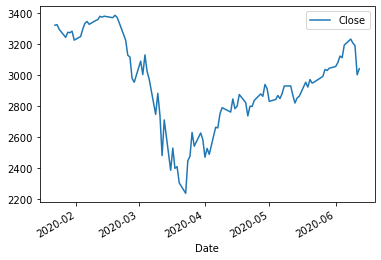

In [5]:
sp500.plot()

In [6]:
confirmed = pd.read_csv("data/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("data/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv('data/time_series_covid19_recovered_global.csv')

In [7]:
confirmed = confirmed.groupby('Country/Region').sum().iloc[:,2:].T
confirmed.index = pd.to_datetime(confirmed.index)
confirmed = confirmed.loc[sp500.index]
deaths = deaths.groupby('Country/Region').sum().iloc[:,2:].T
deaths.index = pd.to_datetime(deaths.index)
deaths = deaths.loc[sp500.index]
recovered = recovered.groupby('Country/Region').sum().iloc[:,2:].T
recovered.index = pd.to_datetime(recovered.index)
recovered = recovered.loc[sp500.index]
n_region = confirmed.apply(lambda x :(x>0).sum(),axis=1)

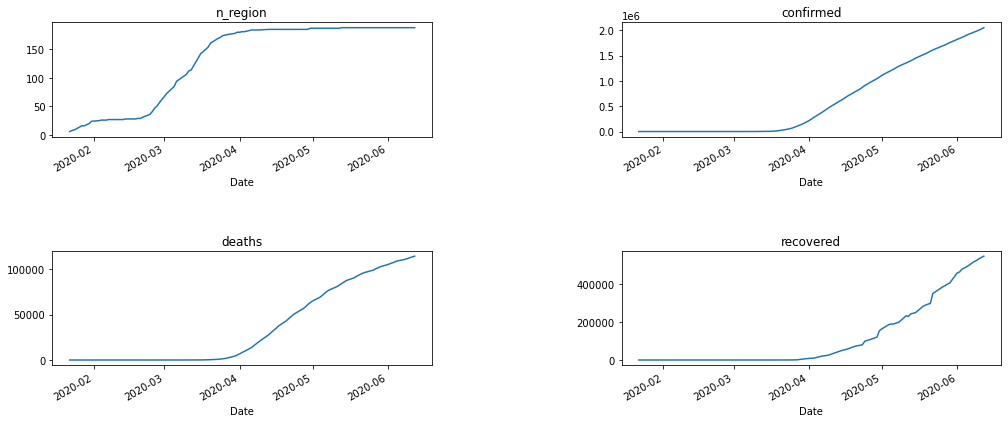

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(17,7))
n_region.plot(ax = ax[0][0],label='sp500')
ax[0][0].set_title('n_region')
confirmed['US'].plot(ax = ax[0][1])
ax[0][1].set_title('confirmed')
deaths['US'].plot(ax = ax[1][0])
ax[1][0].set_title('deaths')
recovered['US'].plot(ax = ax[1][1])
ax[1][1].set_title('recovered')
plt.subplots_adjust(wspace =0.5, hspace =1)#调整子图间距

In [9]:
feature = pd.DataFrame({
    'confirmed': confirmed['US'],
    'deaths':deaths['US'],
    'recovered':recovered['US'],
    'n_region':n_region
})
y = sp500

In [33]:
pd.DataFrame(feature['confirmed']

confirmed
Date                 
2020-01-22          1
2020-01-23          1
2020-01-24          2
2020-01-27          5
2020-01-28          5
...               ...
2020-06-08    1961781
2020-06-09    1979868
2020-06-10    2000702
2020-06-11    2023590
2020-06-12    2048986

[100 rows x 1 columns]

In [37]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso = Lasso(alpha=0.1)
lasso.fit(feature,y)
predict = lasso.predict(feature)

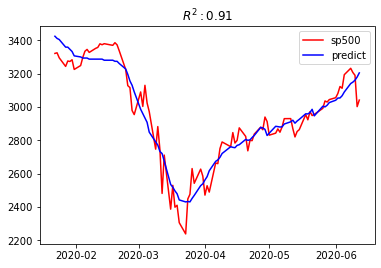

In [38]:
plt.plot(sp500.index,sp500.Close,c='r',label="sp500")
plt.plot(sp500.index,predict,c='b',label='predict')
plt.title("$R^2 : {:.2f}$".format(r2_score(predict,y.values)))
plt.legend()

In [25]:
feature.corr()

confirmed    deaths  recovered  n_region
confirmed   1.000000  0.998283   0.954396  0.699982
deaths      0.998283  1.000000   0.952706  0.678614
recovered   0.954396  0.952706   1.000000  0.558034
n_region    0.699982  0.678614   0.558034  1.000000

In [45]:
print((feature['deaths'] / feature['confirmed']).mean())
print((feature['recovered'] / feature['confirmed']).mean())

0.03670568206476151
0.12736567975076807


In [43]:
l = ['confirmed','deaths','recovered','n_region']
for i in range(4):
    print(l[i]," : ",lasso.coef_[i])
print("bias : ",lasso.intercept_[0])

confirmed  :  0.0020511432591095884
deaths  :  -0.0226324389420085
recovered  :  -0.001162164866930243
n_region  :  -6.5474357315331115
bias :  3464.1778083612044


In [44]:
0.38 * -0.0226324389420085 + 0.128 * -0.001162164866930243 

-0.008749083900930302

In [1]:
-0.008749083900930302 + 0.0020511432591095884

-0.006697940641820714